# <u>Machine Learning: Regression</u>
## <u>Contents</u>
* 1) Importing Libraries and Data
* 2) Data Cleaning
* 3) Data prep for regression analysis
* 4) Hypothesis
* 5) Regression analysis
* 6) Discuss Results


## 1) Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = '/Users/calebhill/Project 6'

In [3]:
file = 'cars_df_clean.csv'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', file), index_col = 0)

## 2) Data Cleaning

In [5]:
df.columns

Index(['price', 'brand', 'year', 'title_status', 'mileage', 'color', 'state',
       'country', 'condition'],
      dtype='object')

In [6]:
df.head()

,price,brand,year,title_status,mileage,color,state,country,condition
0,6300,toyota,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [7]:
df.shape

(2495, 9)

In [8]:
df.isnull().sum()

price           0
brand           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
condition       0
dtype: int64

In [9]:
dups = df.duplicated()

In [10]:
dups.shape 

(2495,)

/var/folders/7b/bf0m4cb16d7_c2lhblbv5c5h0000gn/T/ipykernel_30779/3754297234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'], bins=25)


<Axes: xlabel='year', ylabel='Density'>

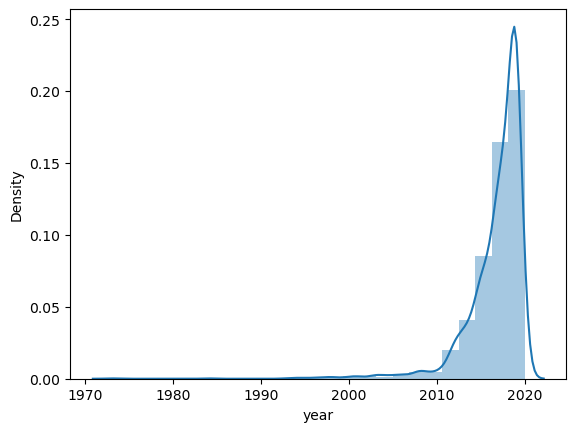

In [11]:
sns.distplot(df['year'], bins=25)

In [12]:
df['year'].mean()

2016.7254509018037

In [13]:
df['year'].median()

2018.0

In [14]:
df['year'].max() 

2020

## 3) Data prep for regression analysis 

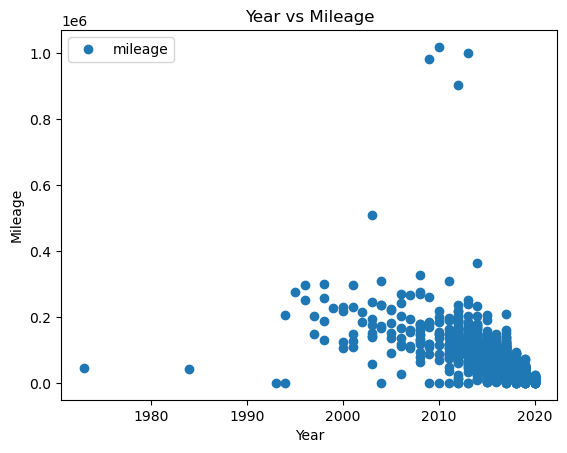

In [15]:
df.plot(x = 'year', y='mileage',style='o') 
plt.title('Year vs Mileage')  
plt.xlabel('Year')  
plt.ylabel('Mileage')  
plt.show()

## 4) Hypothesis
After looking at the above scatterplot, I think that the newer the car is, the lower the mileage will be and vice versa.

In [16]:
X = df['year'].values.reshape(-1,1)
y = df['mileage'].values.reshape(-1,1)

In [17]:
X

array([[2008],
       [2011],
       [2018],
       ...,
       [2018],
       [2018],
       [2018]])

In [18]:
y

array([[274117.],
       [190552.],
       [ 39590.],
       ...,
       [ 31594.],
       [ 32557.],
       [ 31371.]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5) Regression analysis

In [20]:
regression = LinearRegression() 

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
y_predicted = regression.predict(X_test)

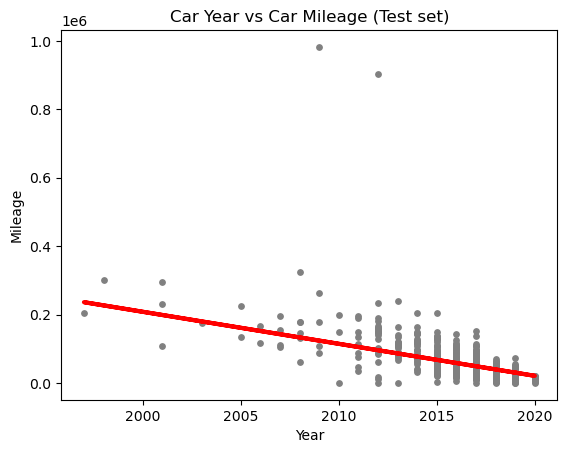

In [23]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Car Year vs Car Mileage (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Mileage')
plot_test.show()

The line of best fit shows a negative correlation but the data points aren't closely bunched and there seem to be some outliers.

In [24]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-9365.75182615]]
Mean squared error:  2713317857.3066144
R2 score:  0.351864964298481


In [26]:
y_predicted

array([[ 30066.29804208],
       [ 30066.29804208],
       [ 30066.29804208],
       [ 86260.808999  ],
       [ 39432.04986823],
       [ 76895.05717285],
       [ 30066.29804208],
       [ 48797.80169439],
       [ 67529.30534669],
       [226747.0863913 ],
       [ 48797.80169439],
       [ 30066.29804208],
       [ 30066.29804208],
       [ 30066.29804208],
       [ 39432.04986823],
       [ 39432.04986823],
       [ 30066.29804208],
       [104992.31265131],
       [ 76895.05717285],
       [ 30066.29804208],
       [ 58163.55352054],
       [ 48797.80169439],
       [ 30066.29804208],
       [ 67529.30534669],
       [142455.31995592],
       [ 58163.55352054],
       [ 48797.80169439],
       [ 39432.04986823],
       [ 39432.04986823],
       [123723.81630361],
       [ 39432.04986823],
       [ 39432.04986823],
       [ 39432.04986823],
       [ 39432.04986823],
       [ 58163.55352054],
       [ 39432.04986823],
       [ 39432.04986823],
       [198649.83091284],
       [ 300

In [27]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,22019.0,30066.298042
1,27665.0,30066.298042
2,40785.0,30066.298042
3,135561.0,86260.808999
4,41351.0,39432.049868
5,86125.0,76895.057173
6,13155.0,30066.298042
7,107569.0,48797.801694
8,137004.0,67529.305347
9,300021.0,226747.086391


(not very accurate)

In [28]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-9365.75182615]]
Mean squared error:  2146978965.995177
R2 score:  0.34508729906098945


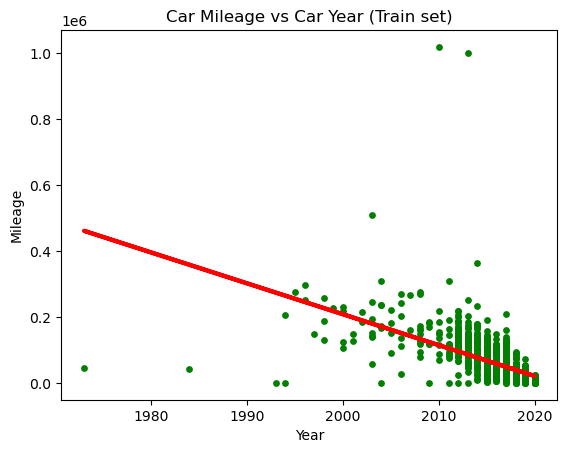

In [32]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Car Mileage vs Car Year (Train set)')
plot_test.xlabel('Year')
plot_test.ylabel('Mileage')
plot_test.show()

## 6) Discuss Results
While there is an apperent correlation between the two variables, the model I created isn't nearly accurate enough with an r2 score of 0.34. I think that removing some of the extreme values in the mileage and year columns would help make it more accurate, but probably not enough. I'm more interested now in using machine learning with the categorical variables like state and brand along with year and mileage, to predict the price of the car, but I'm not sure how to do that using linear regression.